## 1. Introduction to Biostatistics

Biostatistics applies statistical principles to medical, biological, and health-related problems.  
Key uses include:

- Designing clinical trials
- Analyzing biomedical data
- Estimating disease risk and prevalence
- Ensuring **Good Clinical Practice (GCP)** for reliable and ethical research

Let's start with a **basic descriptive statistics example** using a sample dataset:

In [4]:
# Example: Blood Pressure Data of Patients
blood_pressure <- c(120, 130, 128, 135, 140, 125, 138, 142, 150, 132, 136, 180, 125, 123, 120, 120, 160)

# Summary statistics
mean_bp <- mean(blood_pressure)
median_bp <- median(blood_pressure)
sd_bp <- sd(blood_pressure)

list(
  Mean = mean_bp,
  Median = median_bp,
  SD = sd_bp
)

$Mean
[1] 135.5294

$Median
[1] 132

$SD
[1] 15.92215

## 2. Data Visualization in Biostatistics

Plots are essential in biostatistics and clinical research:
- Histograms show the distribution of continuous data.
- Boxplots highlight spread, quartiles, and outliers.
- Density plots estimate the probability distribution.

We’ll now visualize the blood pressure dataset.

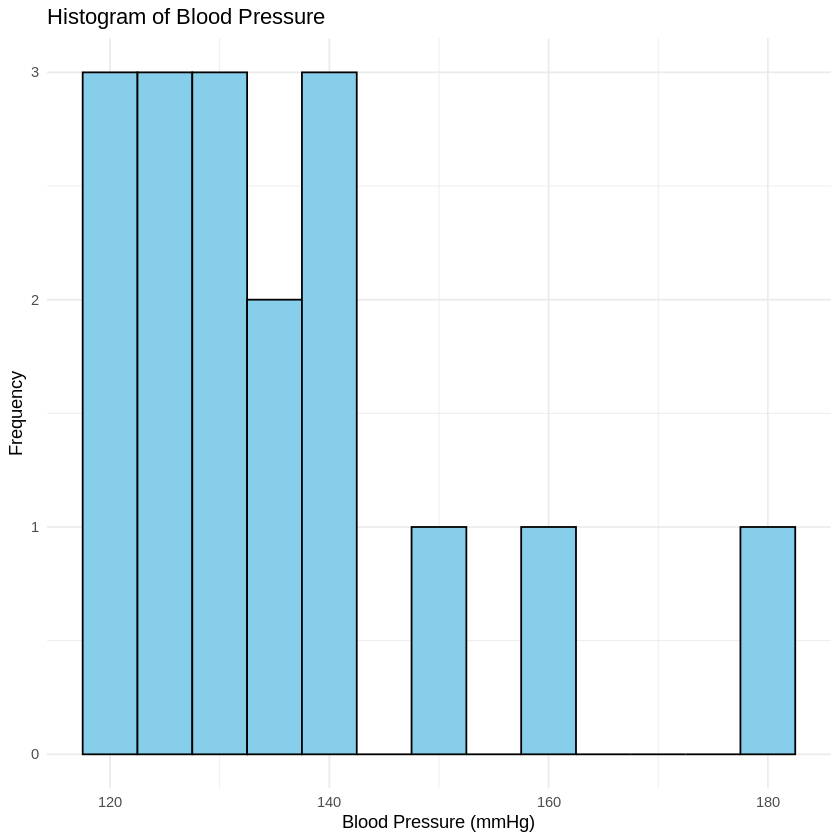

In [5]:
# Visualization libraries
library(ggplot2)

# Create a data frame for plotting
bp_data <- data.frame(BloodPressure = blood_pressure)

# Histogram
ggplot(bp_data, aes(x = BloodPressure)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Blood Pressure",
       x = "Blood Pressure (mmHg)",
       y = "Frequency") +
  theme_minimal()

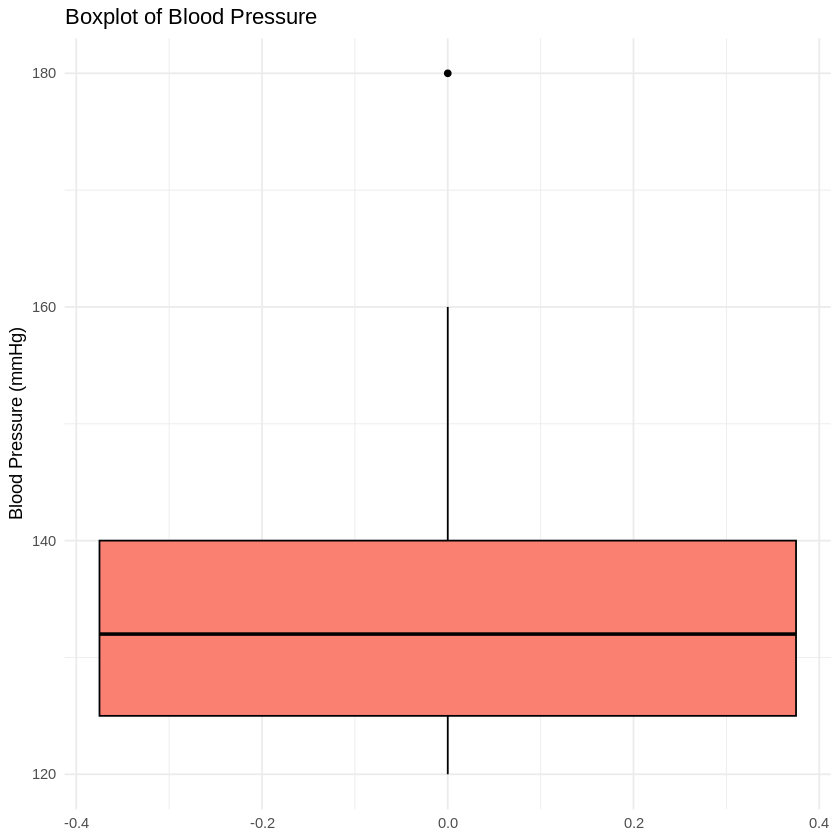

In [6]:
# Boxplot
ggplot(bp_data, aes(y = BloodPressure)) +
  geom_boxplot(fill = "salmon", color = "black") +
  labs(title = "Boxplot of Blood Pressure",
       y = "Blood Pressure (mmHg)") +
  theme_minimal()

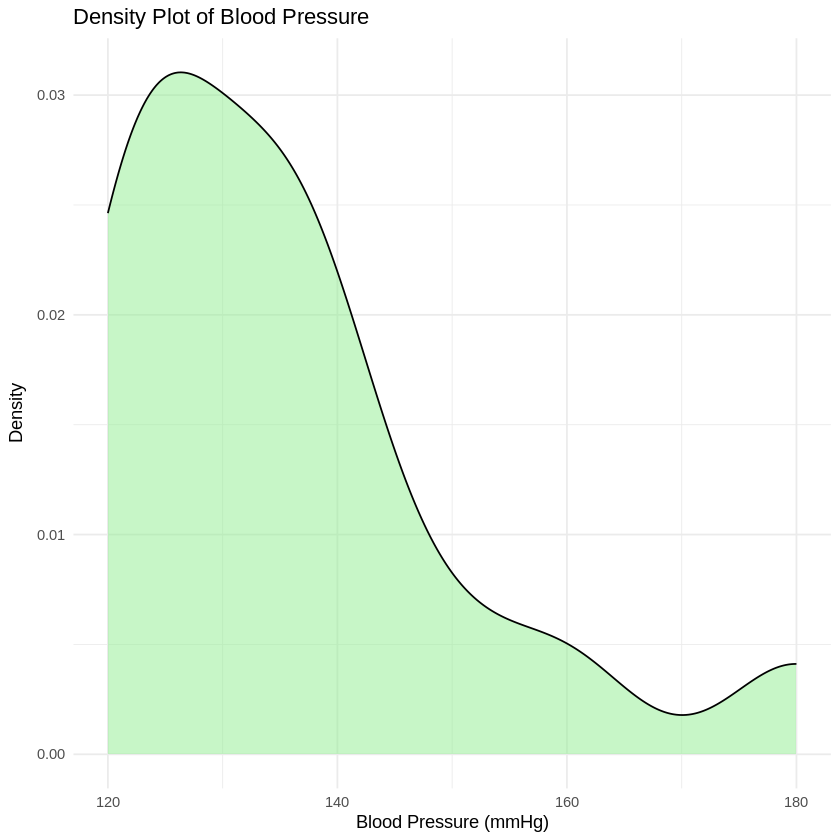

In [7]:
# Density Plot
ggplot(bp_data, aes(x = BloodPressure)) +
  geom_density(fill = "lightgreen", alpha = 0.5) +
  labs(title = "Density Plot of Blood Pressure",
       x = "Blood Pressure (mmHg)",
       y = "Density") +
  theme_minimal()

## 3. Hypothesis Testing: One-Sample t-test

In clinical research, we often test hypotheses such as:

- *Null Hypothesis (H₀)*: The population mean equals a reference value (e.g., `μ = 120 mmHg`)
- *Alternative Hypothesis (H₁)*: The population mean is different (`μ ≠ 120 mmHg`)

We will test whether the patients’ mean blood pressure is significantly different from **120 mmHg**.

In [9]:
# Perform one-sample t-test
test_result <- t.test(blood_pressure, mu = 120)

# Show results
test_result


	One Sample t-test

data:  blood_pressure
t = 4.0214, df = 16, p-value = 0.0009866
alternative hypothesis: true mean is not equal to 120
95 percent confidence interval:
 127.3430 143.7158
sample estimates:
mean of x 
 135.5294 


### Interpretation

- **t-value**: The standardized difference from the null hypothesis.
- **p-value**: If < 0.05, we reject H₀ and conclude mean BP is significantly different from 120 mmHg.
- **Confidence Interval (CI)**: Range of plausible true means.

This type of test is frequently used in:
- Early phase studies to test biomarker levels against normal reference ranges
- Comparing patient measurements to clinical thresholds

## 4. Comparing Two Groups: Independent Two-Sample t-test

In clinical trials, we often compare outcomes (e.g., blood pressure)
between two groups:

- **Treatment group** → receiving the investigational drug
- **Control group** → receiving placebo or standard of care  

**Hypotheses:**

- *H₀*: Mean blood pressure is the same in both groups.  
- *H₁*: Mean blood pressure differs between groups.

In [10]:
set.seed(123) # for reproducibility

# Simulated blood pressure data (mmHg)
treatment <- rnorm(15, mean = 128, sd = 8)   # Treatment group
control   <- rnorm(15, mean = 135, sd = 8)   # Control group

# Combine into a dataframe
trial_data <- data.frame(
  Group = rep(c("Treatment", "Control"), each = 15),
  BloodPressure = c(treatment, control)
)

head(trial_data)

,Group,BloodPressure
,<chr>,<dbl>
1,Treatment,123.5162
2,Treatment,126.1586
3,Treatment,140.4697
4,Treatment,128.5641
5,Treatment,129.0343
6,Treatment,141.7205


In [11]:
# Two-sample t-test
two_sample_test <- t.test(BloodPressure ~ Group, data = trial_data)

two_sample_test


	Welch Two Sample t-test

data:  BloodPressure by Group
t = 1.3346, df = 26.34, p-value = 0.1934
alternative hypothesis: true difference in means between group Control and group Treatment is not equal to 0
95 percent confidence interval:
 -2.053462  9.669843
sample estimates:
  mean in group Control mean in group Treatment 
               133.0273                129.2191 


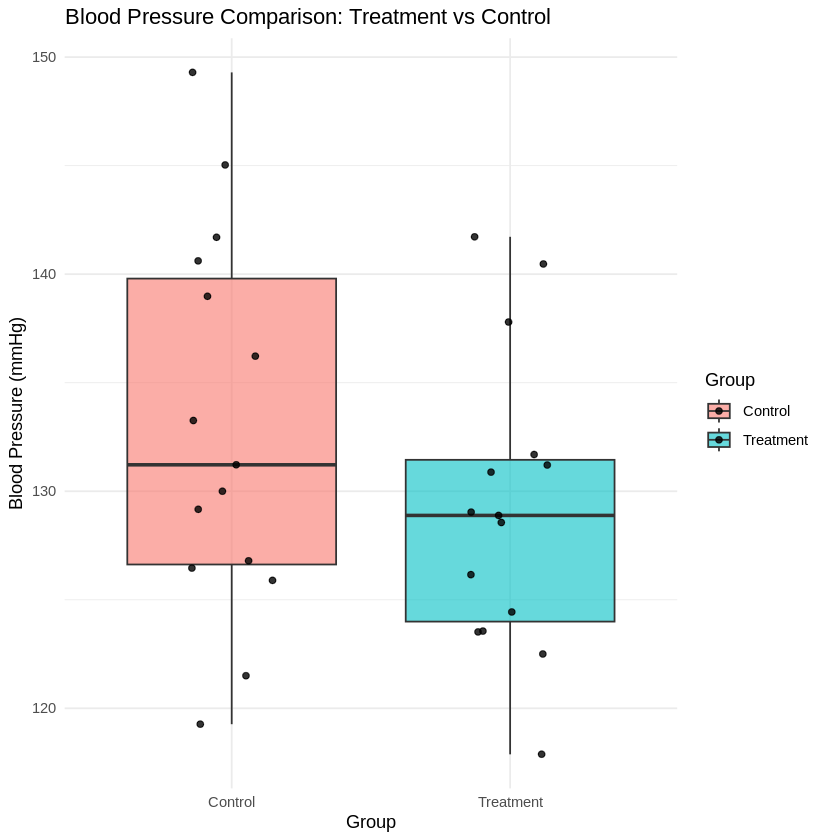

In [12]:
# Visual comparison
library(ggplot2)

ggplot(trial_data, aes(x = Group, y = BloodPressure, fill = Group)) +
  geom_boxplot(alpha = 0.6) +
  geom_jitter(width = 0.15, alpha = 0.8, color = "black") +
  labs(title = "Blood Pressure Comparison: Treatment vs Control",
       y = "Blood Pressure (mmHg)") +
  theme_minimal()

## 5. Categorical Data Analysis: Chi-Square Test

In addition to continuous outcomes (like blood pressure), many clinical trial
endpoints are categorical:

- Did the patient experience a side effect? (Yes/No)  
- Did the treatment achieve response? (Responder/Non-responder)  

We use the **Chi-square test for independence** to check if proportions differ
between groups.

**Hypotheses:**

- *H₀*: Treatment and outcome are independent (no difference in proportions).  
- *H₁*: Treatment and outcome are associated (proportions differ).

In [13]:
# Simulated example: side effects in Treatment vs Control groups
# Rows = Group, Columns = Side Effect (Yes/No)

side_effect_table <- matrix(c(5, 10,   # Treatment group: 5 yes, 10 no
                              12,  3), # Control group: 12 yes, 3 no
                            nrow = 2, byrow = TRUE)

colnames(side_effect_table) <- c("Yes", "No")
rownames(side_effect_table) <- c("Treatment", "Control")

side_effect_table

,Yes,No
Treatment,5,10
Control,12,3


In [14]:
# Perform Chi-square test
chisq_result <- chisq.test(side_effect_table)

chisq_result


	Pearson's Chi-squared test with Yates' continuity correction

data:  side_effect_table
X-squared = 4.8869, df = 1, p-value = 0.02706


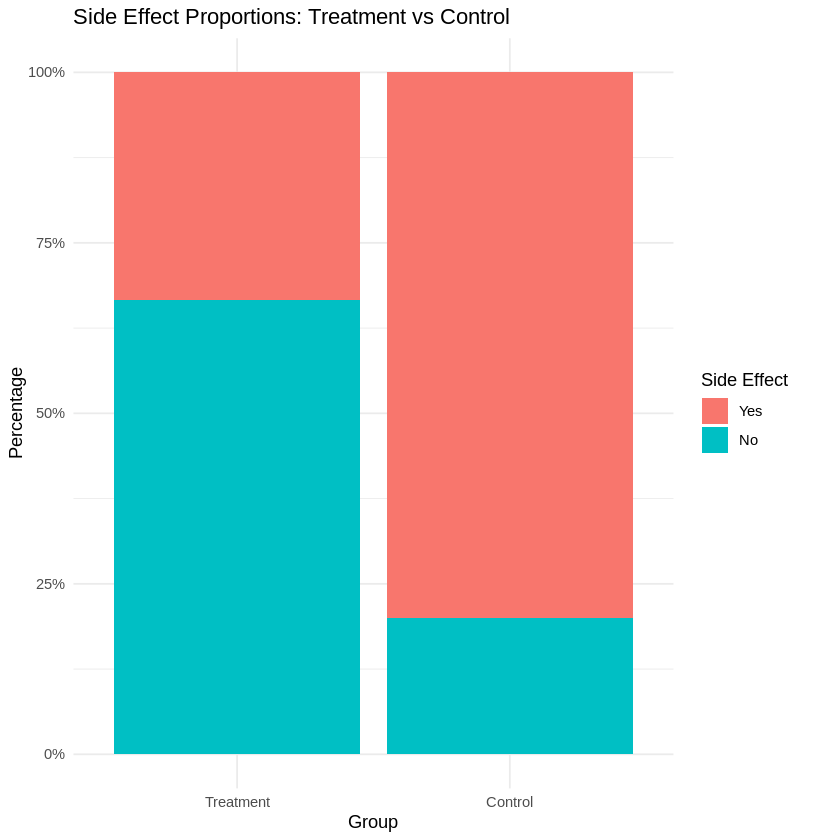

In [15]:
# Visualize proportions as stacked bar plot
library(ggplot2)

# Convert to dataframe for ggplot
side_effect_df <- as.data.frame(as.table(side_effect_table))

ggplot(side_effect_df, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Side Effect Proportions: Treatment vs Control",
       x = "Group", y = "Percentage", fill = "Side Effect") +
  theme_minimal()

## 6. Survival Analysis: Kaplan–Meier Estimation

In many clinical trials, the primary endpoint is **time-to-event**:

- Time until death  
- Time until disease progression  
- Time until relapse  

Kaplan–Meier survival curves estimate survival probabilities over time.

**Hypotheses often tested:**

- *H₀*: Survival distributions are the same for treatment and control groups.  
- *H₁*: Survival differs between groups.

In [1]:
# Install packages if not already available
install.packages("survival")
install.packages("survminer")

library(survival)
library(survminer)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘litedown’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [2]:
# Simulate survival data
set.seed(123)
n <- 50

# Random survival times (exponential distribution, group effect included)
treatment_times <- rexp(n, rate = 0.05)   # longer survival
control_times   <- rexp(n, rate = 0.10)   # shorter survival

# Censoring times (not all patients reach the event)
censoring <- rexp(n*2, rate = 0.02)

time  <- pmin(c(treatment_times, control_times), censoring)
status <- as.numeric(c(treatment_times, control_times) <= censoring) # 1=event, 0=censored
group <- rep(c("Treatment", "Control"), each = n)

surv_data <- data.frame(time = time, status = status, group = group)
head(surv_data)

,time,status,group
,<dbl>,<dbl>,<chr>
1,16.8691452,1,Treatment
2,11.5322054,1,Treatment
3,26.5810974,1,Treatment
4,0.6315472,1,Treatment
5,1.1242195,1,Treatment
6,6.3300243,1,Treatment


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Ignoring unknown labels:
• colour : "Group"


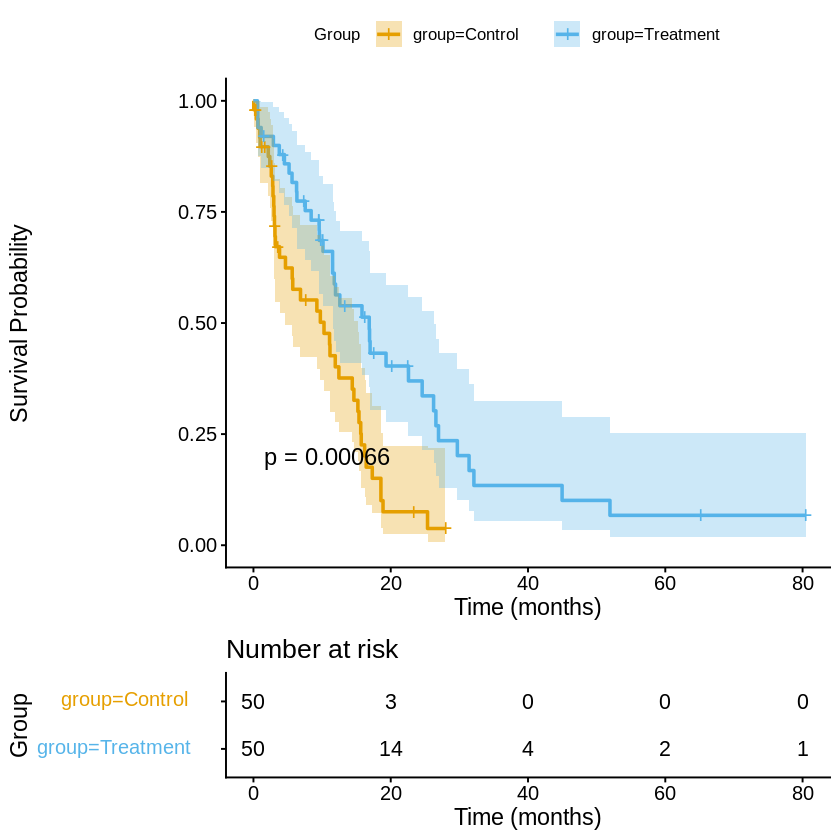

In [3]:
# Kaplan-Meier survival model
km_fit <- survfit(Surv(time, status) ~ group, data = surv_data)

# Plot Kaplan-Meier curves
ggsurvplot(km_fit, data = surv_data,
           risk.table = TRUE,        # Number at risk table
           pval = TRUE,              # p-value from log-rank test
           conf.int = TRUE,          # 95% confidence bands
           xlab = "Time (months)",
           ylab = "Survival Probability",
           legend.title = "Group",
           palette = c("#E69F00", "#56B4E9"))

## 7. Cox Proportional Hazards Regression

While Kaplan–Meier curves compare groups descriptively, the **Cox proportional hazards model**
lets us examine the effect of covariates on survival **while adjusting for confounders**.

**Model:**
h(t | X) = h₀(t) * exp(βX)

Where:
- h(t | X) = hazard function at time t given covariates X
- h₀(t) = baseline hazard
- exp(β) = hazard ratio (HR), interpretable as relative risk

In [21]:
# Add covariates (simulate patient age)
set.seed(999)
surv_data$Age <- round(rnorm(nrow(surv_data), mean = 60, sd = 8))

# Cox model: survival ~ group + age
cox_model <- coxph(Surv(time, status) ~ group + Age, data = surv_data)

summary(cox_model)

Call:
coxph(formula = Surv(time, status) ~ group + Age, data = surv_data)

  n= 100, number of events= 76 

                    coef exp(coef)  se(coef)      z Pr(>|z|)   
groupTreatment -0.815321  0.442497  0.248502 -3.281  0.00103 **
Age             0.001809  1.001811  0.015909  0.114  0.90946   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
groupTreatment    0.4425     2.2599    0.2719    0.7202
Age               1.0018     0.9982    0.9711    1.0335

Concordance= 0.583  (se = 0.038 )
Likelihood ratio test= 11.21  on 2 df,   p=0.004
Wald test            = 11.06  on 2 df,   p=0.004
Score (logrank) test = 11.62  on 2 df,   p=0.003


In [22]:
# Visualize adjusted survival curves
ggcoxadjustedcurves(cox_model, data = surv_data, variable = "group",
                    legend.title = "Group",
                    palette = c("#E69F00", "#56B4E9"))

ERROR: Error in ggcoxadjustedcurves(cox_model, data = surv_data, variable = "group", : could not find function "ggcoxadjustedcurves"


## 8. Analysis of Variance (ANOVA)

The **t-test** works for 2 groups, but in clinical research
we often compare **3 or more arms** (e.g., placebo, low dose, high dose).  
ANOVA tests if at least one group mean differs.

**Hypotheses:**

- *H₀*: All group means are equal.  
- *H₁*: At least one group mean is different.

In [23]:
set.seed(2025)

# Simulated trial with 3 arms (blood pressure reduction, mmHg)
placebo <- rnorm(20, mean = 2,  sd = 1.5)
low_dose <- rnorm(20, mean = 5, sd = 1.8)
high_dose <- rnorm(20, mean = 8, sd = 2.0)

anova_data <- data.frame(
  Reduction = c(placebo, low_dose, high_dose),
  Group = rep(c("Placebo", "Low Dose", "High Dose"), each = 20)
)

head(anova_data)

,Reduction,Group
,<dbl>,<chr>
1,2.931135,Placebo
2,2.053462,Placebo
3,3.159732,Placebo
4,3.908734,Placebo
5,2.556463,Placebo
6,1.755718,Placebo


In [24]:
# Run one-way ANOVA
anova_model <- aov(Reduction ~ Group, data = anova_data)
summary(anova_model)

            Df Sum Sq Mean Sq F value  Pr(>F)    
Group        2  359.3  179.65   59.25 1.2e-14 ***
Residuals   57  172.8    3.03                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [25]:
# Post-hoc test (Tukey's HSD) to see which groups differ
TukeyHSD(anova_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Reduction ~ Group, data = anova_data)

$Group
                        diff       lwr       upr    p adj
Low Dose-High Dose -3.211570 -4.536631 -1.886510 8.00e-07
Placebo-High Dose  -5.988927 -7.313988 -4.663867 0.00e+00
Placebo-Low Dose   -2.777357 -4.102418 -1.452296 1.46e-05


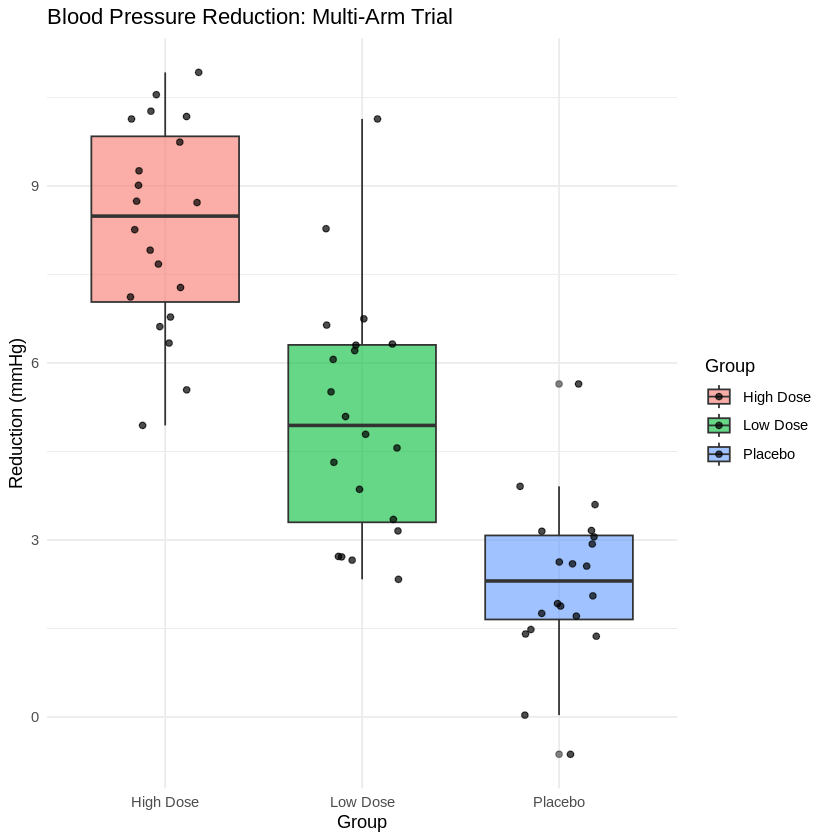

In [26]:
# Visualization
library(ggplot2)

ggplot(anova_data, aes(x = Group, y = Reduction, fill = Group)) +
  geom_boxplot(alpha = 0.6) +
  geom_jitter(width = 0.2, alpha = 0.7) +
  labs(title = "Blood Pressure Reduction: Multi-Arm Trial",
       y = "Reduction (mmHg)") +
  theme_minimal()

## 9. Data Integrity & Cleaning (GCP Perspective)

According to **ICH-GCP**, data used in clinical trials must be:

- **Accurate, complete, and verifiable**
- **Free of systematic errors or protocol violations**
- **Properly managed for missing or outlier values**

We will simulate a dataset with some issues (missing values and outliers)
and apply integrity checks.

In [27]:
set.seed(99)

# Simulate clinical dataset
patient_id <- 1:20
age <- c(55, 60, 62, 58, NA, 65, 70, 95, 52, 61,
         200, 59, 63, 68, 72, NA, 58, 64, 60, 66)  # some NAs & impossible value
bp <- c(120, 125, 130, 118, 117, 145, NA, 138, 150, 136,
        122, 128, 200, 119, 115, 113, 142, NA, 127, 126)  # missing + extreme outlier

data_clinical <- data.frame(PatientID = patient_id, Age = age, BloodPressure = bp)

head(data_clinical)

,PatientID,Age,BloodPressure
,<int>,<dbl>,<dbl>
1,1,55,120
2,2,60,125
3,3,62,130
4,4,58,118
5,5,NA,117
6,6,65,145


In [28]:
# Check for missing values
colSums(is.na(data_clinical))

PatientID           Age BloodPressure 
            0             2             2

In [29]:
# Detect implausible values (e.g., Age > 120, Blood Pressure > 180)
data_clinical[data_clinical$Age > 120 | data_clinical$BloodPressure > 180, ]

,PatientID,Age,BloodPressure
,<int>,<dbl>,<dbl>
NA,NA,NA,NA
NA.1,NA,NA,NA
11,11,200,122
13,13,63,200
NA.2,NA,NA,NA
NA.3,NA,NA,NA


In [30]:
# Summary stats to spot outliers
summary(data_clinical)

   PatientID          Age         BloodPressure  
 Min.   : 1.00   Min.   : 52.00   Min.   :113.0  
 1st Qu.: 5.75   1st Qu.: 59.25   1st Qu.:119.2  
 Median :10.50   Median : 62.50   Median :126.5  
 Mean   :10.50   Mean   : 71.56   Mean   :131.7  
 3rd Qu.:15.25   3rd Qu.: 67.50   3rd Qu.:137.5  
 Max.   :20.00   Max.   :200.00   Max.   :200.0  
                 NA's   :2        NA's   :2      

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


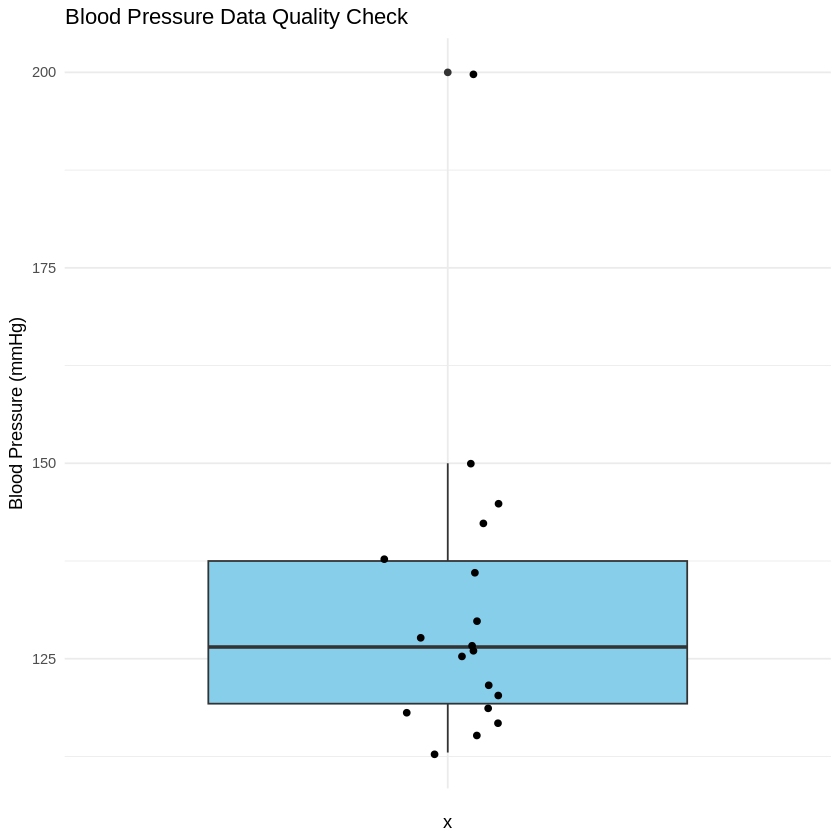

In [31]:
# Visualization for outliers
library(ggplot2)

ggplot(data_clinical, aes(x = "", y = BloodPressure)) +
  geom_boxplot(fill = "skyblue") +
  geom_jitter(width = 0.1, color = "black") +
  labs(title = "Blood Pressure Data Quality Check",
       y = "Blood Pressure (mmHg)") +
  theme_minimal()

## 10. Randomization Methods in Clinical Trials

**Why randomize?**
- To reduce selection bias
- To ensure treatment groups are comparable
- To support validity of statistical inference

Common randomization methods:
1. Simple randomization  
2. Block randomization  
3. Stratified randomization

In [32]:
set.seed(42)

# Number of patients
n <- 20
patients <- paste0("P", 1:n)

In [33]:
# Each patient has equal chance of assignment
simple_random <- sample(rep(c("Treatment", "Control"), length.out = n))

data_simple <- data.frame(PatientID = patients, Group = simple_random)
data_simple

PatientID,Group
<chr>,<chr>
P1,Treatment
P2,Treatment
P3,Treatment
P4,Control
P5,Treatment
P6,Treatment
P7,Control
P8,Control
P9,Control


In [34]:
# Use blocks of 4 patients to ensure equal allocation
block_size <- 4
groups <- rep(c("Treatment", "Control"), block_size / 2)

block_random <- sample(rep(groups, n / block_size))

data_block <- data.frame(PatientID = patients, Group = block_random)
data_block

PatientID,Group
<chr>,<chr>
P1,Treatment
P2,Treatment
P3,Control
P4,Control
P5,Treatment
P6,Control
P7,Control
P8,Treatment
P9,Control


In [35]:
# Patients stratified by gender, then randomized
gender <- sample(c("Male", "Female"), size = n, replace = TRUE)

strata_data <- data.frame(PatientID = patients, Gender = gender)

# Within each stratum, randomize
set.seed(100)
strata_data$Group <- unlist(tapply(strata_data$PatientID, strata_data$Gender,
                                   function(x) sample(rep(c("Treatment", "Control"), length.out = length(x)))))

strata_data

PatientID,Gender,Group
<chr>,<chr>,<chr>
P1,Male,Control
P2,Male,Treatment
P3,Male,Control
P4,Male,Treatment
P5,Female,Treatment
P6,Male,Control
P7,Female,Treatment
P8,Male,Control
P9,Male,Treatment


## 11. Intention-to-Treat (ITT) vs Per-Protocol (PP) Analysis

In GCP-compliant clinical trials, two main analysis sets are used:

- **Intent-to-Treat (ITT):**
  - Includes **all randomized patients**, regardless of protocol deviations, dropouts, or adherence.
  - Preserves randomization balance and reflects *real-world effectiveness*.

- **Per-Protocol (PP):**
  - Includes only patients who **fully adhered** to the protocol.
  - Reflects *true biological efficacy* but may introduce bias.

Both views are essential for:
- Regulatory approval (FDA/EMA typically require ITT as primary).
- Sensitivity analyses of trial robustness.

In [37]:
set.seed(2025)

# Simulated randomized dataset
n <- 20
patients <- paste0("P", 1:n)
group <- sample(c("Treatment", "Control"), n, replace = TRUE)

# Simulated blood pressure reduction
reduction <- ifelse(group == "Treatment",
                    rnorm(n, mean = 8, sd = 2),  # Treatment group effect
                    rnorm(n, mean = 4, sd = 2))  # Control effect

# Dropouts (e.g., 5 patients withdraw early)
dropout <- sample(c(TRUE, FALSE), n, replace = TRUE, prob = c(0.25, 0.75))

trial_data <- data.frame(PatientID = patients, Group = group,
                         Reduction = reduction, Dropout = dropout)

trial_data

PatientID,Group,Reduction,Dropout
<chr>,<chr>,<dbl>,<lgl>
P1,Treatment,7.208607,FALSE
P2,Control,7.639741,TRUE
P3,Control,1.459165,FALSE
P4,Control,5.177632,TRUE
P5,Treatment,10.132324,FALSE
P6,Treatment,7.612607,TRUE
P7,Control,4.567498,TRUE
P8,Treatment,8.835342,FALSE
P9,Control,5.823759,FALSE


In [38]:
# All patients included regardless of dropout
itt_model <- t.test(Reduction ~ Group, data = trial_data)
itt_model


	Welch Two Sample t-test

data:  Reduction by Group
t = -3.4212, df = 10.938, p-value = 0.005756
alternative hypothesis: true difference in means between group Control and group Treatment is not equal to 0
95 percent confidence interval:
 -5.536590 -1.199861
sample estimates:
  mean in group Control mean in group Treatment 
               4.910024                8.278249 


In [39]:
# Exclude those who dropped out
pp_model <- t.test(Reduction ~ Group, data = subset(trial_data, Dropout == FALSE))
pp_model


	Welch Two Sample t-test

data:  Reduction by Group
t = -2.5938, df = 3.9776, p-value = 0.06078
alternative hypothesis: true difference in means between group Control and group Treatment is not equal to 0
95 percent confidence interval:
 -7.3874262  0.2594769
sample estimates:
  mean in group Control mean in group Treatment 
               4.246324                7.810299 


## 12. Handling Missing Data in Clinical Trials

Missing data is a major source of bias in clinical research.  
**Causes:** dropouts, missed visits, technical errors, protocol deviations.

**Common Approaches:**
1. **Complete Case Analysis (CCA)** → analyze only non-missing data, risks bias.  
2. **Last Observation Carried Forward (LOCF)** → carry forward last recorded value, simple but may be unrealistic.  
3. **Multiple Imputation (MI)** → statistically model missingness, more rigorous.

We will demonstrate CCA, LOCF, and a simple imputation.

In [40]:
# Simulated longitudinal blood pressure (3 visits per patient)
set.seed(321)
n <- 12
bp_data <- data.frame(
  PatientID = rep(1:n, each = 3),
  Visit = rep(1:3, times = n),
  BP = rnorm(3*n, mean = 130, sd = 10)
)

# Randomly introduce missing values
missing_index <- sample(1:(3*n), 10)
bp_data$BP[missing_index] <- NA

bp_data

PatientID,Visit,BP
<int>,<int>,<dbl>
1,1,NA
1,2,122.8796
1,3,NA
2,1,128.8035
2,2,128.7604
2,3,132.6818
3,1,137.2684
3,2,132.3314
3,3,NA


In [41]:
cca_data <- na.omit(bp_data)
summary(cca_data)

   PatientID          Visit             BP       
 Min.   : 1.000   Min.   :1.000   Min.   :106.7  
 1st Qu.: 4.000   1st Qu.:1.000   1st Qu.:124.7  
 Median : 7.500   Median :2.000   Median :131.7  
 Mean   : 7.115   Mean   :1.846   Mean   :130.4  
 3rd Qu.:10.000   3rd Qu.:2.000   3rd Qu.:135.5  
 Max.   :12.000   Max.   :3.000   Max.   :154.4  

In [42]:
library(dplyr)

locf_data <- bp_data %>%
  group_by(PatientID) %>%
  arrange(Visit) %>%
  tidyr::fill(BP, .direction = "down")

locf_data


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




PatientID,Visit,BP
<int>,<int>,<dbl>
1,1,NA
2,1,128.8035
3,1,137.2684
4,1,124.4809
5,1,NA
6,1,121.9533
7,1,135.7758
8,1,128.9294
9,1,122.4198


In [43]:
mean_bp <- mean(bp_data$BP, na.rm = TRUE)
imputed_data <- bp_data
imputed_data$BP[is.na(imputed_data$BP)] <- mean_bp

imputed_data

PatientID,Visit,BP
<int>,<int>,<dbl>
1,1,130.3781
1,2,122.8796
1,3,130.3781
2,1,128.8035
2,2,128.7604
2,3,132.6818
3,1,137.2684
3,2,132.3314
3,3,130.3781


CCA may reduce sample size and introduce bias if missingness is not random.
LOCF is often criticized but still seen in older regulatory submissions.
Modern best practice is multiple imputation or mixed-effects models, since they better handle uncertainty.
This snippet shows you understand data hygiene under GCP and how missingness can affect trial conclusions.

## 13. Protocol Deviations & Data Monitoring

**Protocol deviations** occur when:
- Patients miss scheduled visits
- Assessments happen outside allowed visit windows
- Incorrect dosing is administered
- Data are inconsistent with the protocol

These must be identified, tracked, and included in reports.

We will simulate patient visit data and check for:
1. Missing visits
2. Out-of-window visits
3. Outlier measurements

In [44]:
set.seed(555)

# Simulate 10 patients, expected visits at days 0, 30, 60
patients <- 1:10
scheduled_days <- c(0, 30, 60)

protocol_data <- expand.grid(PatientID = patients, VisitDay = scheduled_days)
protocol_data$ObservedDay <- protocol_data$VisitDay + rnorm(nrow(protocol_data), 0, 5)

# Introduce deviations: some missing & extreme delays
protocol_data$ObservedDay[c(5, 12)] <- NA   # missed visits
protocol_data$ObservedDay[20] <- 90         # very late visit

head(protocol_data, 12)

,PatientID,VisitDay,ObservedDay
,<int>,<dbl>,<dbl>
1,1,0,-1.6493015
2,2,0,2.5182322
3,3,0,1.8718478
4,4,0,9.4430990
5,5,0,NA
6,6,0,4.4281555
7,7,0,-0.7838634
8,8,0,6.8227739
9,9,0,0.1831844


In [45]:
library(dplyr)

missing_visits <- protocol_data %>%
  filter(is.na(ObservedDay))

missing_visits

PatientID,VisitDay,ObservedDay
<int>,<dbl>,<dbl>
5,0,NA
2,30,NA


In [46]:
deviations_window <- protocol_data %>%
  filter(!is.na(ObservedDay)) %>%
  filter(abs(ObservedDay - VisitDay) > 7)

deviations_window

PatientID,VisitDay,ObservedDay
<int>,<dbl>,<dbl>
4,0,9.443099
9,30,22.780428
10,30,90.000000
10,60,67.206335


In [47]:
compliance_rate <- sum(!is.na(protocol_data$ObservedDay)) / nrow(protocol_data)
paste0("Overall visit compliance: ", round(compliance_rate * 100, 1), "%")

[1] "Overall visit compliance: 93.3%"

## 14. Rich Visualizations for Clinical Use-Cases
Basic EDA plots are good for exploration, but in clinical research
we often need complex visuals that summarize **multi-dimensional data**.

Here we show:
1. An **Adverse Events heatmap** (patients × event severity × treatment group)  
2. A **Longitudinal trend (spaghetti plot)** for biomarkers over time

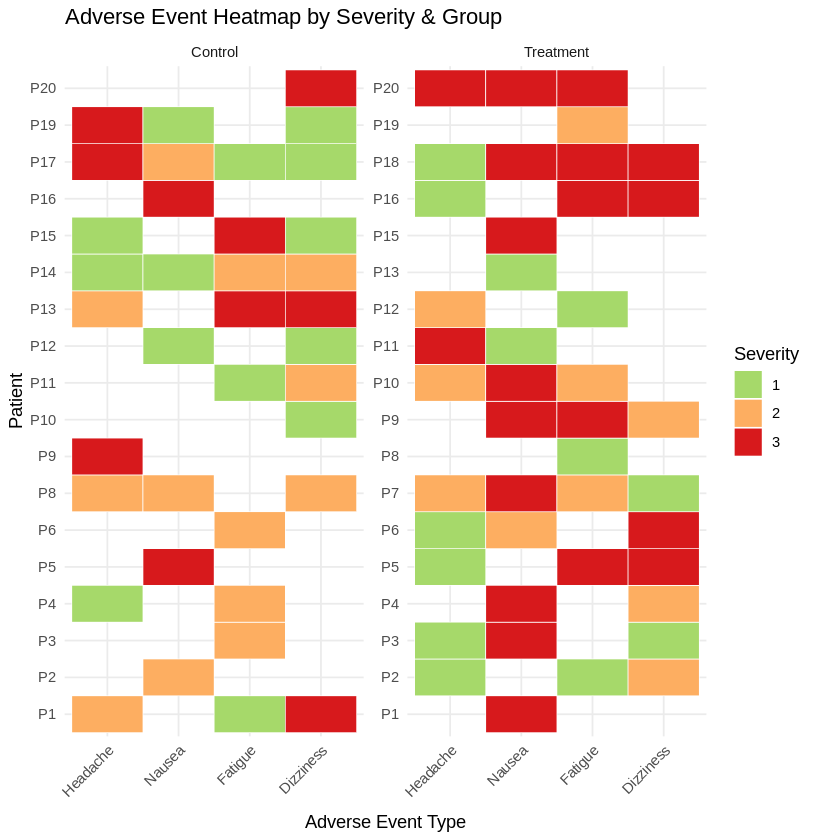

In [48]:
set.seed(77)

# Simulate AE frequency per patient
patients <- paste0("P", 1:20)
aetypes <- c("Headache", "Nausea", "Fatigue", "Dizziness")
severity <- 1:3  # 1= Mild, 2= Moderate, 3= Severe

ae_data <- expand.grid(PatientID = patients, AE = aetypes)
ae_data$Severity <- sample(severity, nrow(ae_data), replace = TRUE)
ae_data$Group <- sample(c("Treatment", "Control"), nrow(ae_data), replace = TRUE)

library(ggplot2)

ggplot(ae_data, aes(x = AE, y = PatientID, fill = factor(Severity))) +
  geom_tile(color = "white") +
  facet_wrap(~Group, scales = "free_y") +
  scale_fill_manual(values = c("1" = "#a6d96a", "2" = "#fdae61", "3" = "#d7191c"),
                    name = "Severity") +
  labs(title = "Adverse Event Heatmap by Severity & Group",
       x = "Adverse Event Type", y = "Patient") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))